In [48]:
import numpy as np
import pandas as pd
import datetime as dt

In [49]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [50]:
fs_con = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\Flight Schedule w Concourse-Copy1.csv')
fs_con.head()

,Id,Flight Date,Flight Arrving Date Time,Flight Departing Date Time,Flight Date Time,Flight Arriving Time,Flight Departing Time,Date Hour Numeric,PA Time,Non-PA Time,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arriving from Airport Id,Departing to Airport Id,Dep Airport Code,Arr Airport Code,Context Airport Id,Non-Context Airport Id,State Id,Arr Terminal,Dep Terminal,Context Terminal,Flight Direction,Flight No,International Domestic,Mainline Low Cost,Service Type,Flight Type,Seats,Load Factor,Estimated Passenger,Flight Distance,Flight Duration,Valid Destination Indicator,Valid Carrier Indicator,Operating Airline Code,Operating Airline Name,TerminalId,Operating Airline Id,Flight Time,nonpaxratio,TSALoadFactor,Departure Concourse
0,98394474,2021-01-02,2021-01-02T11:25:00.000Z,2021-01-02T11:15:00.000Z,2021-01-02T11:15:00.000Z,1900-01-01T11:25:00.000Z,1900-01-01T11:15:00.000Z,2021010211,1900-01-01T11:15:00.000Z,1900-01-01T11:25:00.000Z,6465,77L,404,AIC,100,116,EWR,DEL,116,100,-1,3,B,B,Departure,106,International,NaN,J,All Passenger Flights,238,0.744576,177,7323,820,1,1,AI,Air India,10,404,1900-01-01T11:15:00.000Z,NaN,NaN,Concourse B-3
1,98394693,2021-01-02,2021-01-02T19:10:00.000Z,2021-01-02T15:10:00.000Z,2021-01-02T15:10:00.000Z,1900-01-01T19:10:00.000Z,1900-01-01T15:10:00.000Z,2021010215,1900-01-01T15:10:00.000Z,1900-01-01T19:10:00.000Z,6392,319,677,AVA,298,116,EWR,SAL,116,298,-1,NaN,B,B,Departure,399,International,NaN,J,All Passenger Flights,120,0.836882,100,2067,300,1,1,TA,Taca International Airlines,10,6105,1900-01-01T15:10:00.000Z,NaN,NaN,Hard Stand
2,98394899,2021-01-01,2021-01-01T08:50:00.000Z,2021-01-01T19:30:00.000Z,2021-01-01T19:30:00.000Z,1900-01-01T08:50:00.000Z,1900-01-01T19:30:00.000Z,2021010119,1900-01-01T19:30:00.000Z,1900-01-01T08:50:00.000Z,6395,321,6110,DJT,254,116,EWR,ORY,116,254,-1,4,B,B,Departure,101,International,NaN,J,All Passenger Flights,76,0.336623,25,3648,440,1,1,B0,La Compagnie,10,6110,1900-01-01T19:30:00.000Z,NaN,NaN,Concourse B-2
3,98394900,2021-01-02,2021-01-02T08:50:00.000Z,2021-01-02T19:30:00.000Z,2021-01-02T19:30:00.000Z,1900-01-01T08:50:00.000Z,1900-01-01T19:30:00.000Z,2021010219,1900-01-01T19:30:00.000Z,1900-01-01T08:50:00.000Z,6395,321,6110,DJT,254,116,EWR,ORY,116,254,-1,4,B,B,Departure,101,International,NaN,J,All Passenger Flights,76,0.336623,25,3648,440,1,1,B0,La Compagnie,10,6110,1900-01-01T19:30:00.000Z,NaN,NaN,Concourse B-2
4,98394985,2021-01-01,2021-01-01T11:00:00.000Z,2021-01-01T21:50:00.000Z,2021-01-01T21:50:00.000Z,1900-01-01T11:00:00.000Z,1900-01-01T21:50:00.000Z,2021010121,1900-01-01T21:50:00.000Z,1900-01-01T11:00:00.000Z,6395,321,6110,DJT,254,116,EWR,ORY,116,254,-1,4,B,B,Departure,103,International,NaN,J,All Passenger Flights,76,0.336623,25,3648,430,1,1,B0,La Compagnie,10,6110,1900-01-01T21:50:00.000Z,NaN,NaN,Concourse B-3


In [51]:
fs_con.shape

(28308, 45)

In [52]:
fs_con.dtypes

Id                               int64
Flight Date                     object
Flight Arrving Date Time        object
Flight Departing Date Time      object
Flight Date Time                object
Flight Arriving Time            object
Flight Departing Time           object
Date Hour Numeric                int64
PA Time                         object
Non-PA Time                     object
Aircraft Id                      int64
Aircraft Code                   object
Airline Id                       int64
ICAO Airline                    object
Arriving from Airport Id         int64
Departing to Airport Id          int64
Dep Airport Code                object
Arr Airport Code                object
Context Airport Id               int64
Non-Context Airport Id           int64
State Id                         int64
Arr Terminal                    object
Dep Terminal                    object
Context Terminal                object
Flight Direction                object
Flight No                

In [53]:
#filter for B concourses
fs = fs_con[fs_con['Departure Concourse'].isin(['Concourse B-1', 'Concourse B-2','Concourse B-3'])]

In [54]:
fs = fs.replace({'Departure Concourse':{'Concourse B-1':'B1','Concourse B-2':'B2','Concourse B-3':'B3'}})

In [55]:
start, stop = 0, 10

fs['Dept Date'] = fs['Flight Departing Date Time'].str.slice(start, stop)

In [56]:
start, stop = 11, 16

fs['Dept Time'] = fs['Flight Departing Date Time'].str.slice(start, stop)

In [57]:
fs['Dept_Date_Time'] = fs['Dept Date']+' '+fs['Dept Time'].astype(str)
fs['Dept_Date_Time'] = pd.to_datetime(fs['Dept_Date_Time'], format='%Y-%m-%d %H:%M:%S')

In [58]:
fs['Hour'] = fs['Dept_Date_Time'].dt.hour

In [59]:
morning = [6,7,8,9,10,11,12]
afternoon = [13,14,15,16,17]
evening = [18,19,20,21,22]
overnight = [23,0,1,2,3,4,5]

In [60]:
lsthour = []
for s in fs['Hour']:
        if s in morning:
            lsthour.append('Morning')
        elif s in afternoon:
            lsthour.append('Afternoon')
        elif s in evening:
            lsthour.append('Evening')
        elif s in overnight:
            lsthour.append('Overnight')

In [61]:
fs['Time Category'] = lsthour

In [62]:
fs['DOW'] = fs['Dept_Date_Time'].dt.weekday
fs['DOW_l'] = fs['DOW'].copy()
fs["DOW_l"].replace({0: "Monday", 1: "Tuesday",2:"Wednesday",3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}, inplace=True)

In [63]:
fs['Month'] = fs['Dept_Date_Time'].dt.month

In [64]:
fs9 = fs[fs['Month'] == 9]

In [18]:
fs9.head(3)

,Id,Flight Date,Flight Arrving Date Time,Flight Departing Date Time,Flight Date Time,Flight Arriving Time,Flight Departing Time,Date Hour Numeric,PA Time,Non-PA Time,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arriving from Airport Id,Departing to Airport Id,Dep Airport Code,Arr Airport Code,Context Airport Id,Non-Context Airport Id,State Id,Arr Terminal,Dep Terminal,Context Terminal,Flight Direction,Flight No,International Domestic,Mainline Low Cost,Service Type,Flight Type,Seats,Load Factor,Estimated Passenger,Flight Distance,Flight Duration,Valid Destination Indicator,Valid Carrier Indicator,Operating Airline Code,Operating Airline Name,TerminalId,Operating Airline Id,Flight Time,nonpaxratio,TSALoadFactor,Departure Concourse,Dept Date,Dept Time,Dept_Date_Time,Hour,Time Category,DOW,DOW_l,Month
11234,302448396,2021-09-01,2021-09-01T08:40:00.000Z,2021-09-01T19:00:00.000Z,2021-09-01T19:00:00.000Z,1900-01-01T08:40:00.000Z,1900-01-01T19:00:00.000Z,2021090119,1900-01-01T19:00:00.000Z,1900-01-01T08:40:00.000Z,6395,321,6110,DJT,254,116,EWR,ORY,116,254,-1,4,B,B,Departure,101,International,NaN,J,All Passenger Flights,76,0.818251,62,3648,460,1,1,B0,La Compagnie,10,6110,1900-01-01T19:00:00.000Z,NaN,NaN,B2,2021-09-01,19:00,2021-09-01 19:00:00,19,Evening,2,Wednesday,9
11235,302450828,2021-09-01,2021-09-01T20:10:00.000Z,2021-09-01T18:05:00.000Z,2021-09-01T18:05:00.000Z,1900-01-01T20:10:00.000Z,1900-01-01T18:05:00.000Z,2021090118,1900-01-01T18:05:00.000Z,1900-01-01T20:10:00.000Z,6614,CR9,1486,DAL,107,116,EWR,DTW,116,107,23,EM,B,B,Departure,4870,Domestic,NaN,J,All Passenger Flights,76,0.499208,37,488,125,1,1,9E,Endeavor Air,10,6109,1900-01-01T18:05:00.000Z,NaN,NaN,B1,2021-09-01,18:05,2021-09-01 18:05:00,18,Evening,2,Wednesday,9
11236,302450874,2021-09-01,2021-09-01T12:47:00.000Z,2021-09-01T10:50:00.000Z,2021-09-01T10:50:00.000Z,1900-01-01T12:47:00.000Z,1900-01-01T10:50:00.000Z,2021090110,1900-01-01T10:50:00.000Z,1900-01-01T12:47:00.000Z,6614,CR9,1486,DAL,94,116,EWR,CVG,116,94,18,NaN,B,B,Departure,4987,Domestic,NaN,J,All Passenger Flights,76,0.499208,37,569,117,1,1,9E,Endeavor Air,10,6109,1900-01-01T10:50:00.000Z,NaN,NaN,B1,2021-09-01,10:50,2021-09-01 10:50:00,10,Morning,2,Wednesday,9


In [19]:
fs9.shape

(1556, 53)

In [20]:
fs9 = fs9[['Flight No','Dept_Date_Time','Departure Concourse','Time Category','Hour','Flight Date','DOW','Operating Airline Name','International Domestic','Arr Airport Code','Flight Distance','Seats','Estimated Passenger']]
fs9.head()

,Flight No,Dept_Date_Time,Departure Concourse,Time Category,Hour,Flight Date,DOW,Operating Airline Name,International Domestic,Arr Airport Code,Flight Distance,Seats,Estimated Passenger
11234,101,2021-09-01 19:00:00,B2,Evening,19,2021-09-01,2,La Compagnie,International,ORY,3648,76,62
11235,4870,2021-09-01 18:05:00,B1,Evening,18,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11236,4987,2021-09-01 10:50:00,B1,Morning,10,2021-09-01,2,Endeavor Air,Domestic,CVG,569,76,37
11237,4857,2021-09-01 12:59:00,B1,Morning,12,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11238,1529,2021-09-01 06:10:00,B1,Morning,6,2021-09-01,2,Delta Air Lines,Domestic,DTW,488,180,91


In [21]:
tfs9 = fs9[['Departure Concourse','Time Category','International Domestic','Operating Airline Name','Flight Distance','Seats','Estimated Passenger','Flight No']].groupby(['Departure Concourse','Time Category','International Domestic'], as_index=False).agg({'Flight Distance':'mean','Seats':'mean','Estimated Passenger':'mean','Flight No':'count'})

In [22]:
pd.set_option('max_rows',200)
tfs9

,Departure Concourse,Time Category,International Domestic,Flight Distance,Seats,Estimated Passenger,Flight No
0,B1,Afternoon,Domestic,896.810811,164.305019,108.891892,259
1,B1,Evening,Domestic,915.141079,177.402490,124.261411,241
2,B1,Evening,International,3648.000000,76.000000,62.000000,2
3,B1,Morning,Domestic,986.280230,168.197697,111.228407,521
4,B1,Morning,International,1546.000000,186.000000,151.833333,30
5,B1,Overnight,Domestic,1022.333333,228.000000,174.000000,3
6,B2,Afternoon,International,336.000000,74.000000,56.000000,25
7,B2,Evening,Domestic,937.000000,186.000000,127.000000,6
8,B2,Evening,International,3341.921875,212.328125,128.078125,64
9,B2,Morning,International,336.000000,74.000000,56.000000,37


In [23]:
#tfs9.to_csv('concourse_agg.csv')

In [24]:
fs9.head()

,Flight No,Dept_Date_Time,Departure Concourse,Time Category,Hour,Flight Date,DOW,Operating Airline Name,International Domestic,Arr Airport Code,Flight Distance,Seats,Estimated Passenger
11234,101,2021-09-01 19:00:00,B2,Evening,19,2021-09-01,2,La Compagnie,International,ORY,3648,76,62
11235,4870,2021-09-01 18:05:00,B1,Evening,18,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11236,4987,2021-09-01 10:50:00,B1,Morning,10,2021-09-01,2,Endeavor Air,Domestic,CVG,569,76,37
11237,4857,2021-09-01 12:59:00,B1,Morning,12,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11238,1529,2021-09-01 06:10:00,B1,Morning,6,2021-09-01,2,Delta Air Lines,Domestic,DTW,488,180,91


In [25]:
fs9.shape

(1556, 13)

In [26]:
fs9_a = fs9[['Departure Concourse','Flight Date','Hour','International Domestic','Flight No','Estimated Passenger']].groupby(by=['Departure Concourse','Flight Date','Hour','International Domestic'],as_index=False,dropna=False).agg({'Flight No':'count','Estimated Passenger':'sum'})
fs9_a.sort_values(['Flight Date','Hour','Departure Concourse', 'International Domestic'],inplace=True)
fs9_a.head(30)

,Departure Concourse,Flight Date,Hour,International Domestic,Flight No,Estimated Passenger
624,B3,2021-09-01,0,Domestic,1,127
625,B3,2021-09-01,5,Domestic,2,348
0,B1,2021-09-01,6,Domestic,4,375
1,B1,2021-09-01,6,International,1,152
2,B1,2021-09-01,7,Domestic,4,460
3,B1,2021-09-01,8,Domestic,3,331
626,B3,2021-09-01,8,Domestic,1,127
4,B1,2021-09-01,9,Domestic,2,313
5,B1,2021-09-01,10,Domestic,2,176
6,B1,2021-09-01,11,Domestic,4,484


In [27]:
#expected number of rows for 3 concourses, 30 days, 24 hours, dom vs intl
3*30*24*2

4320

In [28]:
fs9_a.shape

(883, 6)

In [29]:
# the groupby dataframe is missing rows, so create a new empty dataframe with the proper dimensions
ind = pd.MultiIndex.from_product([fs9['Departure Concourse'].unique(), fs9['Flight Date'].unique(), [h for h in range(24)], fs9['International Domestic'].unique()])
fs9_a1 = pd.DataFrame(np.zeros((4320,2)),columns=['Flight No', 'Estimated Passenger'],index = ind)
fs9_a1.reset_index(inplace=True)
fs9_a1.columns = fs9_a.columns
fs9_a1.sort_values(['Flight Date','Hour','Departure Concourse','International Domestic'],inplace=True)
fs9_a1.reset_index(inplace=True,drop=True)
fs9_a1.drop(['Flight No','Estimated Passenger'],axis=1,inplace=True)
fs9_a1.head(20)


,Departure Concourse,Flight Date,Hour,International Domestic
0,B1,2021-09-01,0,Domestic
1,B1,2021-09-01,0,International
2,B2,2021-09-01,0,Domestic
3,B2,2021-09-01,0,International
4,B3,2021-09-01,0,Domestic
5,B3,2021-09-01,0,International
6,B1,2021-09-01,1,Domestic
7,B1,2021-09-01,1,International
8,B2,2021-09-01,1,Domestic
9,B2,2021-09-01,1,International


In [30]:
fs9_a2 = pd.merge(fs9_a1,fs9_a,how='left',left_on=['Flight Date','Hour','Departure Concourse','International Domestic'], right_on=['Flight Date','Hour','Departure Concourse','International Domestic']).fillna(0)
fs9_a2.tail(20)

,Departure Concourse,Flight Date,Hour,International Domestic,Flight No,Estimated Passenger
4300,B3,2021-09-30,20,Domestic,0.0,0.0
4301,B3,2021-09-30,20,International,2.0,302.0
4302,B1,2021-09-30,21,Domestic,2.0,266.0
4303,B1,2021-09-30,21,International,0.0,0.0
4304,B2,2021-09-30,21,Domestic,0.0,0.0
4305,B2,2021-09-30,21,International,1.0,101.0
4306,B3,2021-09-30,21,Domestic,0.0,0.0
4307,B3,2021-09-30,21,International,1.0,53.0
4308,B1,2021-09-30,22,Domestic,0.0,0.0
4309,B1,2021-09-30,22,International,0.0,0.0


In [31]:
fs9_b = fs9_a2.groupby(by=['Departure Concourse','Hour','International Domestic'],as_index=False).mean()
fs9_b.sort_values(['Hour','Departure Concourse', 'International Domestic'],inplace=True)
fs9_b.head(30)

,Departure Concourse,Hour,International Domestic,Flight No,Estimated Passenger
0,B1,0,Domestic,0.000000,0.000000
1,B1,0,International,0.000000,0.000000
48,B2,0,Domestic,0.166667,21.166667
49,B2,0,International,0.000000,0.000000
96,B3,0,Domestic,0.066667,8.466667
97,B3,0,International,0.000000,0.000000
2,B1,1,Domestic,0.000000,0.000000
3,B1,1,International,0.000000,0.000000
50,B2,1,Domestic,0.000000,0.000000
51,B2,1,International,0.000000,0.000000


In [32]:
fs9_c = fs9_b.pivot(index=['Departure Concourse','Hour'],columns = 'International Domestic',values = ['Flight No','Estimated Passenger'])
fs9_c

Flight No               Estimated Passenger  \
International Domestic    Domestic International            Domestic   
Departure Concourse Hour                                               
B1                  0     0.000000      0.000000            0.000000   
                    1     0.000000      0.000000            0.000000   
                    2     0.000000      0.000000            0.000000   
                    3     0.000000      0.000000            0.000000   
                    4     0.000000      0.000000            0.000000   
                    5     0.100000      0.000000           17.400000   
                    6     2.833333      1.000000          256.566667   
                    7     1.733333      0.000000          212.866667   
                    8     2.033333      0.000000          249.433333   
                    9     2.200000      0.000000          300.733333   
                    10    1.800000      0.000000          179.200000   
                    11    3.700000      0.000000          439.366667   
                    12    3.066667      0.000000          293.500000   
                    13    0.600000      0.000000           51.200000   
                    14    2.766667      0.000000          284.100000   
                    15    1.333333      0.000000          182.633333   
                    16    0.333333      0.000000           29.633333   
                    17    3.600000      0.000000          392.533333   
                    18    3.300000      0.000000          391.266667   
                    19    1.800000      0.066667          243.366667   
                    20    1.133333      0.000000          123.533333   
                    21    1.766667      0.000000          235.833333   
                    22    0.033333      0.000000            4.233333   
                    23    0.000000      0.000000            0.000000   
B2                  0     0.166667      0.000000           21.166667   
                    1     0.000000      0.000000            0.000000   
                    2     0.000000      0.000000            0.000000   
                    3     0.000000      0.000000            0.000000   
                    4     0.000000      0.000000            0.000000   
                    5     0.000000      0.000000            0.000000   
                    6     0.000000      0.000000            0.000000   
                    7     0.000000      0.433333            0.000000   
                    8     0.000000      0.000000            0.000000   
                    9     0.000000      0.000000            0.000000   
                    10    0.000000      0.400000            0.000000   
                    11    0.000000      0.400000            0.000000   
                    12    0.000000      0.000000            0.000000   
                    13    0.000000      0.133333            0.000000   
                    14    0.000000      0.333333            0.000000   
                    15    0.000000      0.000000            0.000000   
                    16    0.000000      0.066667            0.000000   
                    17    0.000000      0.300000            0.000000   
                    18    0.000000      0.000000            0.000000   
                    19    0.000000      0.966667            0.000000   
                    20    0.000000      0.066667            0.000000   
                    21    0.000000      0.633333            0.000000   
                    22    0.200000      0.466667           25.400000   
                    23    0.000000      0.866667            0.000000   
B3                  0     0.066667      0.000000            8.466667   
                    1     0.000000      0.000000            0.000000   
                    2     0.000000      0.000000            0.000000   
                    3     0.000000      0.000000            0.000000   
                    4     0.000000      0.000000            0.000

In [33]:
b1 = fs9_c.loc['B1',:]
b2 = fs9_c.loc['B2',:]
b3 = fs9_c.loc['B3',:]

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
b1

Flight No               Estimated Passenger  \
International Domestic  Domestic International            Domestic   
Hour                                                                 
0                       0.000000      0.000000            0.000000   
1                       0.000000      0.000000            0.000000   
2                       0.000000      0.000000            0.000000   
3                       0.000000      0.000000            0.000000   
4                       0.000000      0.000000            0.000000   
5                       0.100000      0.000000           17.400000   
6                       2.833333      1.000000          256.566667   
7                       1.733333      0.000000          212.866667   
8                       2.033333      0.000000          249.433333   
9                       2.200000      0.000000          300.733333   
10                      1.800000      0.000000          179.200000   
11                      3.700000      0.000000          439.366667   
12                      3.066667      0.000000          293.500000   
13                      0.600000      0.000000           51.200000   
14                      2.766667      0.000000          284.100000   
15                      1.333333      0.000000          182.633333   
16                      0.333333      0.000000           29.633333   
17                      3.600000      0.000000          392.533333   
18                      3.300000      0.000000          391.266667   
19                      1.800000      0.066667          243.366667   
20                      1.133333      0.000000          123.533333   
21                      1.766667      0.000000          235.833333   
22                      0.033333      0.000000            4.233333   
23                      0.000000      0.000000            0.000000   

                                      
International Domestic International  
Hour                                  
0                           0.000000  
1                           0.000000  
2                           0.000000  
3                           0.000000  
4                           0.000000  
5                           0.000000  
6                         151.833333  
7                           0.000000  
8                           0.000000  
9                           0.000000  
10                          0.000000  
11                          0.000000  
12                          0.000000  
13                          0.000000  
14                          0.000000  
15                          0.000000  
16                          0.000000  
17                          0.000000  
18                          0.000000  
19                          4.133333  
20                          0.000000  
21                          0.000000  
22                          0.000000  
23                          0.000000

In [36]:
b1.loc[:,'Estimated Passenger']

International Domestic,Domestic,International
Hour,,
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,17.400000,0.000000
6,256.566667,151.833333
7,212.866667,0.000000
8,249.433333,0.000000


Text(0.5, 1.0, 'B1')

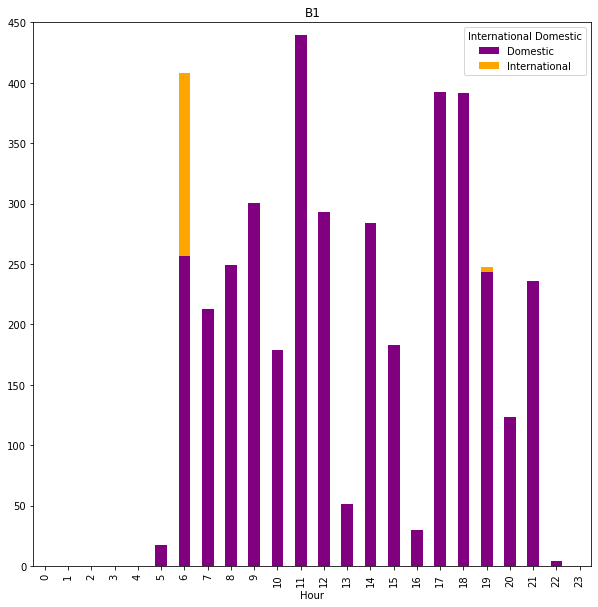

In [37]:
b1.loc[:,'Estimated Passenger'].plot(kind='bar',stacked=True,figsize=(10,10), color = ['purple','orange'])
plt.ylim([0,450])
plt.title('B1')

The international flight in B1 is a daily flight to Cancun on Frontier. It usually departs from B1, but sometimes from B3.

Text(0.5, 1.0, 'B2')

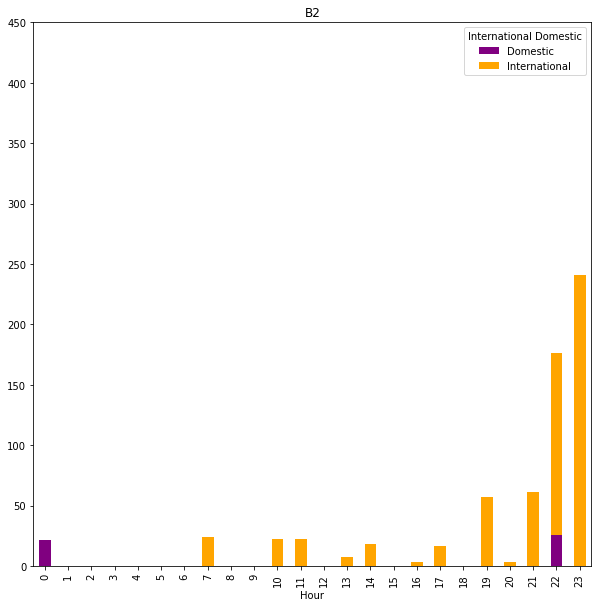

In [38]:
b2.loc[:,'Estimated Passenger'].plot(kind='bar',stacked=True,figsize=(10,10), color = ['purple','orange'])
plt.ylim([0,450])
plt.title('B2')

Text(0.5, 1.0, 'B3')

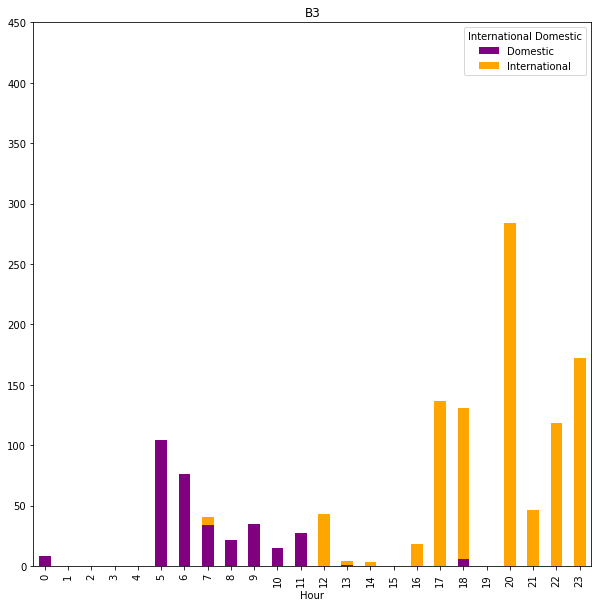

In [39]:
b3.loc[:,'Estimated Passenger'].plot(kind='bar',stacked=True,figsize=(10,10), color = ['purple','orange'])
plt.ylim([0,450])
plt.title('B3')

In [212]:
# For B1, what is the international flight at 6am?
fs9.loc[(fs9['Departure Concourse'] == 'B1') & (fs9['International Domestic'] == 'International'),:].head()

,Flight No,Dept_Date_Time,Departure Concourse,Time Category,Hour,Flight Date,DOW,Operating Airline Name,International Domestic,Arr Airport Code,Flight Distance,Seats,Estimated Passenger
11254,43,2021-09-01 06:14:00,B1,Morning,6,2021-09-01,2,Frontier Airlines,International,CUN,1546,186,152
11304,43,2021-09-02 06:14:00,B1,Morning,6,2021-09-02,3,Frontier Airlines,International,CUN,1546,186,152
11376,43,2021-09-03 06:48:00,B1,Morning,6,2021-09-03,4,Frontier Airlines,International,CUN,1546,186,152
11434,43,2021-09-04 06:14:00,B1,Morning,6,2021-09-04,5,Frontier Airlines,International,CUN,1546,186,152
11488,43,2021-09-05 06:48:00,B1,Morning,6,2021-09-05,6,Frontier Airlines,International,CUN,1546,186,152


In [213]:
fs_con.loc[(fs_con['Operating Airline Name'] == 'Frontier Airlines') & (fs_con['Flight No'] == 43) & (fs_con['Flight Date'] == '2021-09-09'),:].head()

,Id,Flight Date,Flight Arrving Date Time,Flight Departing Date Time,Flight Date Time,Flight Arriving Time,Flight Departing Time,Date Hour Numeric,PA Time,Non-PA Time,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arriving from Airport Id,Departing to Airport Id,Dep Airport Code,Arr Airport Code,Context Airport Id,Non-Context Airport Id,State Id,Arr Terminal,Dep Terminal,Context Terminal,Flight Direction,Flight No,International Domestic,Mainline Low Cost,Service Type,Flight Type,Seats,Load Factor,Estimated Passenger,Flight Distance,Flight Duration,Valid Destination Indicator,Valid Carrier Indicator,Operating Airline Code,Operating Airline Name,TerminalId,Operating Airline Id,Flight Time,nonpaxratio,TSALoadFactor,Departure Concourse
11720,309056308,2021-09-09,2021-09-09T09:16:00.000Z,2021-09-09T06:14:00.000Z,2021-09-09T06:14:00.000Z,1900-01-01T09:16:00.000Z,1900-01-01T06:14:00.000Z,2021090906,1900-01-01T06:14:00.000Z,1900-01-01T09:16:00.000Z,6394,320,1974,FFT,92,116,EWR,CUN,116,92,-1,4,B,B,Departure,43,International,NaN,J,All Passenger Flights,186,0.818251,152,1546,242,1,1,F9,Frontier Airlines,10,1974,1900-01-01T06:14:00.000Z,NaN,NaN,Concourse B-1


In [214]:
fs_con.loc[(fs_con['Operating Airline Name'] == 'Frontier Airlines') & (fs_con['Flight No'] == 43),'Departure Concourse'].value_counts()

Concourse B-1    144
Concourse B-3     73
Hard Stand        11
Name: Departure Concourse, dtype: int64

In [215]:
fs9.head()

,Flight No,Dept_Date_Time,Departure Concourse,Time Category,Hour,Flight Date,DOW,Operating Airline Name,International Domestic,Arr Airport Code,Flight Distance,Seats,Estimated Passenger
11234,101,2021-09-01 19:00:00,B2,Evening,19,2021-09-01,2,La Compagnie,International,ORY,3648,76,62
11235,4870,2021-09-01 18:05:00,B1,Evening,18,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11236,4987,2021-09-01 10:50:00,B1,Morning,10,2021-09-01,2,Endeavor Air,Domestic,CVG,569,76,37
11237,4857,2021-09-01 12:59:00,B1,Morning,12,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11238,1529,2021-09-01 06:10:00,B1,Morning,6,2021-09-01,2,Delta Air Lines,Domestic,DTW,488,180,91


In [216]:
fs9_d = fs9[['Departure Concourse','Operating Airline Name','Estimated Passenger']].groupby(['Departure Concourse','Operating Airline Name'],as_index=False).sum()
fs9_d

,Departure Concourse,Operating Airline Name,Estimated Passenger
0,B1,Delta Air Lines,19313
1,B1,Endeavor Air,3907
2,B1,Frontier Airlines,25495
3,B1,La Compagnie,124
4,B1,SkyWest Airlines,2516
5,B1,Spirit Airlines,69946
6,B2,Emirates,7223
7,B2,Ethiopian Airlines,1717
8,B2,French Bee,4521
9,B2,Frontier Airlines,1397


In [217]:
fs9_d[fs9_d['Departure Concourse'] == 'B3']

,Departure Concourse,Operating Airline Name,Estimated Passenger
12,B3,Air India,1485
13,B3,Allegiant Air,1680
14,B3,Austrian Airlines,720
15,B3,El Al Israel Airlines,639
16,B3,Emirates,1112
17,B3,Frontier Airlines,635
18,B3,Icelandair,4317
19,B3,LOT Polish Airlines,3560
20,B3,Lufthansa German Airlines,6162
21,B3,SAS - Scandinavian Airlines Sys.,1392


In [218]:
fs9_e = fs9_d.pivot(index=['Operating Airline Name'],columns = 'Departure Concourse',values = 'Estimated Passenger').fillna(0)
fs9_e

Departure Concourse,B1,B2,B3
Operating Airline Name,,,
Air India,0.0,0.0,1485.0
Allegiant Air,0.0,0.0,1680.0
Austrian Airlines,0.0,0.0,720.0
Delta Air Lines,19313.0,0.0,0.0
El Al Israel Airlines,0.0,0.0,639.0
Emirates,0.0,7223.0,1112.0
Endeavor Air,3907.0,0.0,0.0
Ethiopian Airlines,0.0,1717.0,0.0
French Bee,0.0,4521.0,0.0


In [219]:
fs9_e.to_csv('airlinexconcourse.csv')

In [229]:
fs9_f = fs9[['Departure Concourse','Arr Airport Code','Flight No']].groupby(['Departure Concourse','Arr Airport Code'],as_index=False).count().sort_values(['Departure Concourse','Flight No'],ascending=False)

In [232]:
fs9_f[fs9_f['Departure Concourse'] == 'B3']

,Departure Concourse,Arr Airport Code,Flight No
41,B3,LIS,48
37,B3,FRA,30
32,B3,CPH,26
39,B3,KEF,24
45,B3,MUC,21
56,B3,ZRH,18
42,B3,MCO,17
36,B3,FLL,16
44,B3,MSP,16
34,B3,DEL,15


In [233]:
fs9['Operating Airline Name'].value_counts()

Spirit Airlines                           511
Delta Air Lines                           223
Frontier Airlines                         206
Endeavor Air                              106
Porter Airlines                            76
SkyWest Airlines                           68
Lufthansa German Airlines                  56
Tap-Portuguese Airlines (TAP Portugal)     55
SAS - Scandinavian Airlines Sys.           43
Allegiant Air                              31
Emirates                                   30
Icelandair                                 24
La Compagnie                               21
Swiss International Airlines               18
Ethiopian Airlines                         17
LOT Polish Airlines                        17
Sun Country Airlines                       16
Air India                                  15
French Bee                                 14
Austrian Airlines                           6
El Al Israel Airlines                       3
Name: Operating Airline Name, dtyp

In [235]:
fs9.loc[(fs9['Departure Concourse'] == 'B3') & (fs9['Operating Airline Name'] == 'Spirit Airlines'),'Arr Airport Code'].value_counts()

MCO    17
FLL    16
ATL     9
LAS     1
MYR     1
Name: Arr Airport Code, dtype: int64